# Análise de Vendas em Cafeterias ☕📊

Neste projeto, utilizarei um dataset público com dados de transações realizadas em uma rede de cafeterias. O objetivo é explorar e entender os padrões de consumo de clientes, identificar os produtos mais vendidos, analisar o desempenho das lojas por localização e levantar insights que possam apoiar 

Este notebook será desenvolvido para as etapas:
1. Preparação para Modelagem
2. Divisão em Conjuntos de Treino e Teste
3. Treinamento e avaliação de modelos de classificação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#Modelos ML
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier



df_model = pd.read_csv("C:/data/Video Game Sales/video_game_sales_com_target.csv")

In [2]:
df_model.head()

,title,console,console_fabricator,genre,publisher,developer,release_date,ano,total_sales,na_sales,jp_sales,pal_sales,other_sales,Sucesso
0,Grand Theft Auto V,PS3,Sony,Action,Rockstar Games,Rockstar North,2013-09-17,2013,20.33,6.37,0.99,9.85,3.12,1
1,Grand Theft Auto V,PS4,Sony,Action,Rockstar Games,Rockstar North,2014-11-18,2014,19.39,6.06,0.60,9.71,3.02,1
2,Grand Theft Auto: Vice City,PS2,Sony,Action,Rockstar Games,Rockstar North,2002-10-28,2002,16.15,8.41,0.47,5.49,1.78,1
3,Grand Theft Auto V,X360,Microsoft,Action,Rockstar Games,Rockstar North,2013-09-17,2013,15.87,9.06,0.06,5.33,1.42,1
4,Call of Duty: Black Ops 3,PS4,Sony,Shooter,Activision,Treyarch,2015-11-06,2015,15.08,6.18,0.41,6.05,2.44,1


### Preparação para Modelagem

Nesta etapa, preparo os dados para os modelos de Machine Learning:
- Separação das variáveis independentes (features) e da variável alvo (target)
- Codificação das variáveis categóricas com One-Hot Encoding
- Escalonamento de variáveis numéricas

In [3]:
# Separando X e y
x = df_model.drop(columns=['Sucesso'])
y = df_model['Sucesso']

In [4]:
# Identificando colunas categóricas e numéricas
cat_cols = x.select_dtypes(include='object').columns
num_cols = x.select_dtypes(include='number').columns

In [5]:
cat_cols

Index(['title', 'console', 'console_fabricator', 'genre', 'publisher',
       'developer', 'release_date'],
      dtype='object')

In [6]:
num_cols

Index(['ano', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales'],
      dtype='object')

#### Definindo o pipeline de pré-processamento para demonstração da transformação das novas colunas

In [7]:
# Define o OneHotEncoder com saída esparsa
onehot_sparse = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

# Define o OneHotEncoder com saída densa
onehot_dense = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor_data_sparse = ColumnTransformer(transformers=[
    ('cat', onehot_sparse, cat_cols),
    ('num', StandardScaler(), num_cols)
])

preprocessor_data_dense = ColumnTransformer(transformers=[
    ('cat', onehot_dense, cat_cols),
    ('num', StandardScaler(), num_cols)
])

In [8]:
# Verificando a forma dos dados transformados
X_processed_data_sparse = preprocessor_data_sparse.fit_transform(x)
X_processed_data_dense = preprocessor_data_dense.fit_transform(x)

print("Shape antes:", x.shape)
print("Shape depois do preprocessamento esparso:", X_processed_data_sparse.shape)
print("Shape depois do preprocessamento denso:", X_processed_data_dense.shape)

Shape antes: (17298, 13)
Shape depois do preprocessamento esparso: (17298, 19082)
Shape depois do preprocessamento denso: (17298, 19082)


### Divisão em Conjuntos de Treino e Teste

Dividi os dados em treino (70%) e teste (30%), utilizando a estratégia `stratify` para preservar a proporção da variável alvo `Sucesso`, que está desbalanceada.


In [9]:
# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # para manter a proporção de classes
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (12108, 13)
Tamanho do conjunto de teste: (5190, 13)


In [10]:
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_train: (12108,)
Tamanho de y_test: (5190,)


### Avaliação de cada modelo


### Modelo: Dummy ###
              precision    recall  f1-score   support

           0     0.9154    1.0000    0.9558      4751
           1     0.0000    0.0000    0.0000       439

    accuracy                         0.9154      5190
   macro avg     0.4577    0.5000    0.4779      5190
weighted avg     0.8380    0.9154    0.8750      5190



C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


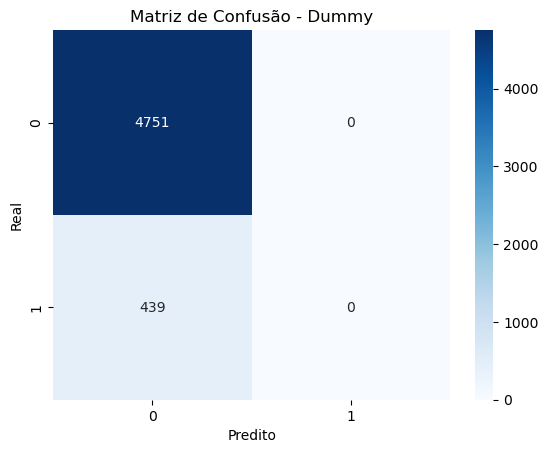


### Modelo: KNN ###
              precision    recall  f1-score   support

           0     0.9840    0.9979    0.9909      4751
           1     0.9731    0.8246    0.8927       439

    accuracy                         0.9832      5190
   macro avg     0.9786    0.9112    0.9418      5190
weighted avg     0.9831    0.9832    0.9826      5190



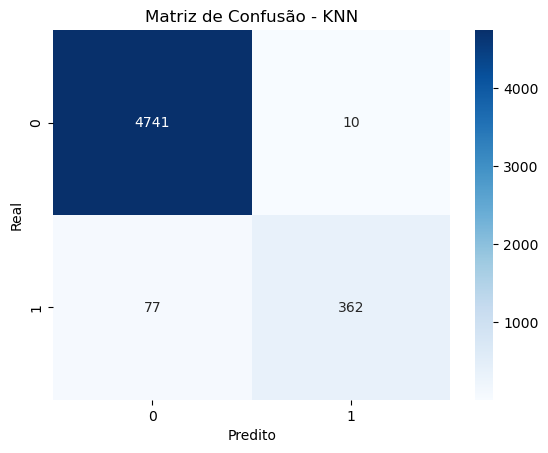


### Modelo: Random Forest ###
              precision    recall  f1-score   support

           0     0.9987    0.9996    0.9992      4751
           1     0.9954    0.9863    0.9908       439

    accuracy                         0.9985      5190
   macro avg     0.9971    0.9930    0.9950      5190
weighted avg     0.9985    0.9985    0.9985      5190



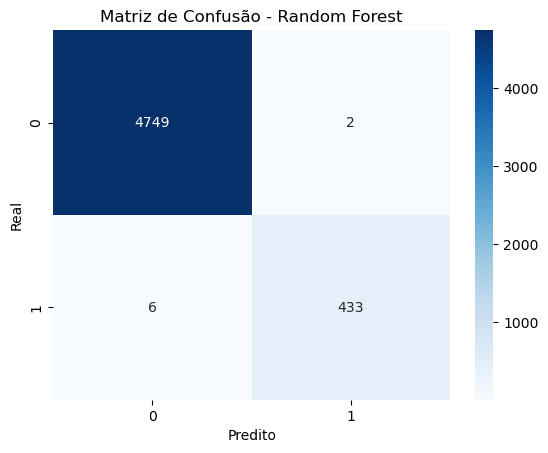


### Modelo: Logistic Regression ###
              precision    recall  f1-score   support

           0     0.9979    0.9992    0.9985      4751
           1     0.9908    0.9772    0.9839       439

    accuracy                         0.9973      5190
   macro avg     0.9943    0.9882    0.9912      5190
weighted avg     0.9973    0.9973    0.9973      5190



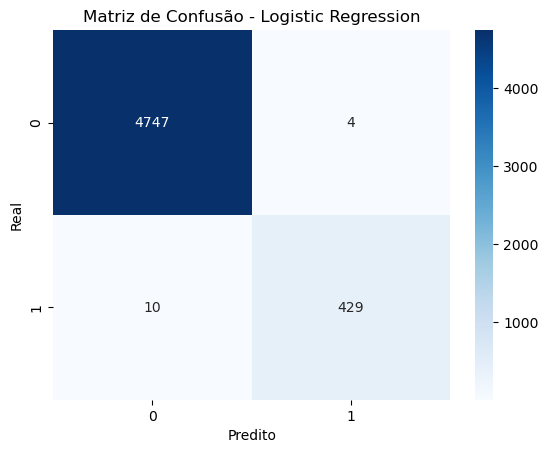

In [11]:
# Dicionário seletor de modelos
seletor = {
    'Dummy': '[X]',
    'KNN': '[X]',
    'Random Forest': '[X]',
    'Logistic Regression': '[X]',
    'Decision Tree': '[]',
    'Naive Bayes': '[]',
    'LightGBM': '[]',
}

# Dicionário dos modelos
modelos_disponiveis = {
    'Dummy': DummyClassifier(strategy='most_frequent', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Filtra os modelos selecionados pelo seletor
modelos_selecionados = {
    nome: modelo
    for nome, modelo in modelos_disponiveis.items()
    if seletor.get(nome) == '[X]'
}

# Dicionário para armazenar os pipelines treinados
pipelines_treinados = {}


# Avaliação de cada modelo
for nome, modelo in modelos_selecionados.items():
    print(f'\n### Modelo: {nome} ###')

    # Escolhe o preprocessor adequado
    if nome == 'Naive Bayes':
        preprocessor = preprocessor_data_dense
    else:
        preprocessor = preprocessor_data_sparse

    # Criação do pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])

    # Treinamento e avaliação
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Armazena o pipeline
    pipelines_treinados[nome] = pipeline

    # Relatório e matriz
    print(classification_report(y_test, y_pred, digits=4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()


### 🎯 Escolha do Modelo

Após testar os modelos de classificação — Dummy Classifier, K-Nearest Neighbors (KNN), Random Forest e Regressão Logística — optei por utilizar o **Random Forest** como modelo final.

Essa escolha se deu principalmente por dois motivos:

1. **Performance geral superior**: o Random Forest apresentou o melhor equilíbrio entre precisão, recall e F1-score para a classe **“Sucesso”**, que é a classe de maior interesse do projeto.
2. **Robustez e interpretabilidade**: além de lidar bem com variáveis categóricas e numéricas, o Random Forest permite visualizar a importância de cada feature, o que pode ser útil em análises futuras.

---

### 📏 Métrica Prioritária

Durante a avaliação dos modelos, a **métrica F1-score** para a classe “Sucesso” foi priorizada.

O motivo é que esse projeto tem como objetivo prever se um jogo será ou não um sucesso. Como estou lidando com um possível **desequilíbrio entre as classes**, métricas como **acurácia podem ser enganosas** — um modelo que sempre prevê a classe majoritária pode ter alta acurácia, mas baixo desempenho real.


In [12]:
pipeline_rf = pipelines_treinados['Random Forest']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4751
           1       0.99      0.98      0.98       439

    accuracy                           1.00      5190
   macro avg       0.99      0.99      0.99      5190
weighted avg       1.00      1.00      1.00      5190



In [13]:
joblib.dump(pipeline_rf, 'vgchartz_model_random_forest.joblib')

['vgchartz_model_random_forest.joblib']